<a href="https://colab.research.google.com/github/prasunamishra/Worksheet0/blob/main/Worksheet0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
time_data = [(3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)]

low_study = []
moderate_study = []
high_study = []

for study, entertainment, sleep in time_data:
    if study < 3:
        low_study.append(study)
    elif 3 <= study <= 5:
        moderate_study.append(study)
    else:
        high_study.append(study)

print("Low study time:", low_study)
print("Moderate study time:", moderate_study)
print("High study time:", high_study)

print("\n #Study Time Counts")
print("Low study days:", len(low_study))
print("Moderate study days:", len(moderate_study))
print("High study days:", len(high_study))

study_minutes = []
for study, entertainment, sleep in time_data:
    study_minutes.append(study * 60)

print("\nStudy hours in minutes:", study_minutes)

study_hours = []
entertainment_hours = []
sleep_hours = []

for study, entertainment, sleep in time_data:
    study_hours.append(study)
    entertainment_hours.append(entertainment)
    sleep_hours.append(sleep)

avg_study = sum(study_hours) / len(study_hours)
avg_entertainment = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print("\n #Average Daily Hours")
print("Average Study Hours:", avg_study)
print("Average Entertainment Hours:", avg_entertainment)
print("Average Sleep Hours:", avg_sleep)


Low study time: [2.5, 1.5, 2.0, 2.5]
Moderate study time: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study time: [5.5, 6.0]

 #Study Time Counts
Low study days: 4
Moderate study days: 9
High study days: 2

Study hours in minutes: [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]

 #Average Daily Hours
Average Study Hours: 3.7
Average Entertainment Hours: 2.5
Average Sleep Hours: 7.166666666666667


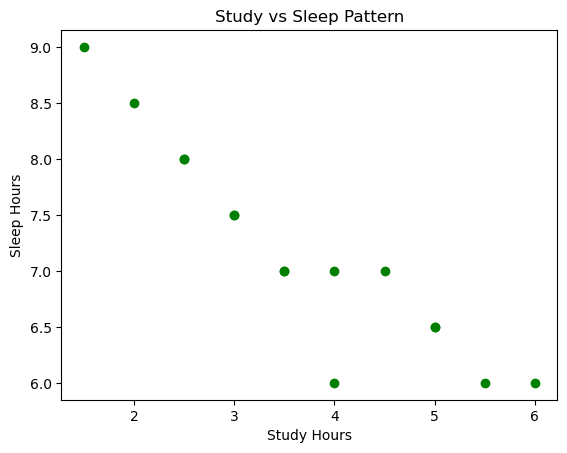

In [ ]:
import matplotlib.pyplot as plt

study_hours = [t[0] for t in time_data]
sleep_hours = [t[2] for t in time_data]

def plot_study_sleep():
    plt.scatter(study_hours, sleep_hours, color='green')
    plt.xlabel("Study Hours")
    plt.ylabel("Sleep Hours")
    plt.title("Study vs Sleep Pattern")
    plt.show()

plot_study_sleep()


In [ ]:
nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]

def sum_nested_list(nested_list):
    """
    Calculate the sum of all numbers in a nested list.
    This function takes a list that may contain integers and other nested lists.
    It recursively traverses the list and sums all the integers, no matter how deeply
    nested they are.
    Args:
    nested_list (list): A list that may contain integers or other lists of integers.
    Returns:
    int: The total sum of all integers in the nested list, including those in sublists
    .
    Example:
    >>> sum_nested_list([1, [2, [3, 4], 5], 6, [7, 8]])
    36
    >>> sum_nested_list([1, [2, 3], [4, [5]]])
    15
    """
    total = 0
    for element in nested_list:
        if isinstance(element, list): # Check if the element is a list
            total += sum_nested_list(element) # Recursively sum the nested list
        else:
            total += element # Add the number to the total
    return total


sum_nested_list(nested_list)

In [ ]:
def generate_permutations(s):
    """function to Takes a string s as input and returns a list of all unique permutations. """
    if len(s) <= 1:
        return [s]

    permutations = []
    for i, char in enumerate(s):
        rest = s[:i] + s[i+1:]
        for perm in generate_permutations(rest):
            permutations.append(char + perm)


    return list(set(permutations))

print(generate_permutations("abc"))

['bac', 'cab', 'abc', 'cba', 'acb', 'bca']


In [ ]:
directory_structure = {
"file1.txt": 200,
"file2.txt": 300,
"subdir1": {
"file3.txt": 400,
"file4.txt": 100
},
"subdir2": {
"subsubdir1": {
"file5.txt": 250
},
"file6.txt": 150
}
}

def calculate_directory_size(directory):
    """Return the total size of the directory."""
    total_size = 0

    for name, value in directory.items():
        if isinstance(value, dict):
            total_size += calculate_directory_size(value)
        else:
            total_size += value

    return total_size
total_size= calculate_directory_size(directory_structure)
print(f"total directory size : {total_size}")

total directory size : 1400


In [ ]:
def min_coins(coins, amount):
    """
     Finds the minimum number of coins needed to make up a given amount using dynamic
  programming.
  This function solves the coin change problem by determining the fewest number of
  coins from a given set of coin denominations that sum up to a target amount. The
  solution uses dynamic programming(tabulation) to iteratively build up the minimum
  number of coins required for each amount.
  Parameters:
  coins (list of int): A list of coin denominations available for making change. Each
  coin denomination is a positive integer.
  amount (int): The target amount for which we need to find the minimum number of coins
  . It must be a non-negative integer.
  Returns:
  int: The minimum number of coins required to make the given amount.
  If it is not possible to make the amount with the given coins, returns -1.
  Example:
  >>> min_coins([1, 2, 5], 11)
  3
  >>> min_coins([2], 3)
  -1
    """
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0
    for coin in coins:
        for i in range(coin, amount + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)
    return dp[amount] if dp[amount] != float('inf') else -1

# Test with the given example
coins = [1, 2, 5]
amount = 11
result = min_coins(coins, amount)
print(f"Minimum coins required to make {amount} using coins {coins}: {result}")


Minimum coins required to make 11 using coins [1, 2, 5]: 3


In [ ]:
def longest_common_subsequence(s1, s2):
    """function to uses DP to find the length of the LCS of two strings s1 and s2."""
    n, m = len(s1), len(s2)
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[n][m]

s1 = "abcde"
s2 = "ace"
result = longest_common_subsequence(s1, s2)
print(f"Length of LCS for '{s1}' and '{s2}': {result}")

Length of LCS for 'abcde' and 'ace': 3


In [ ]:
def knapsack(weights, values, capacity):
    """function to  Uses DP to determine the maximum value that can be achieved within the given weight capacity."""
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]


    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], values[i - 1] + dp[i - 1][w - weights[i - 1]])
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][capacity]


weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7
result = knapsack(weights, values, capacity)
print(f"Maximum value for weights {weights}, values {values}, and capacity {capacity}: {result}")


Maximum value for weights [1, 3, 4, 5], values [1, 4, 5, 7], and capacity 7: 9
